# Activity: Evaluate simple linear regression

## Introduction

In this activity, you will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, you will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

This activity will develop your knowledge of linear regression and your skills evaluating regression results which will help prepare you for modeling to provide business recommendations in the future.

## Step 1: Imports

### Import packages

Import relevant Python libraries and packages. In this activity, you will need to use `pandas`, `pyplot` from `matplotlib`, and `seaborn`.

In [1]:
# Import pandas, pyplot from matplotlib, and seaborn.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the statsmodel module and the ols function

Import the `statsmodels.api` Python module using its common abbreviation, `sm`, along with the `ols()` function from `statsmodels.formula.api`. To complete this, you will need to write the imports as well.

In [2]:
# Import the statsmodels module.
import statsmodels.api as sm

# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

### Load the dataset

`Pandas` was used to load the provided dataset `marketing_and_sales_data_evaluate_lr.csv` as `data`, now display the first five rows. This is a fictional dataset that was created for educational purposes. The variables in the dataset have been kept as is to suit the objectives of this activity. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###
data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.

### YOUR CODE HERE ### 

## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts `Sales` so they have a better understanding of what promotions they should invest in in the future. To accomplish this, you'll construct a simple linear regression model that predicts sales using a single independent variable. 

**Question:** What are some reasons for conducting an EDA before constructing a simple linear regression model?

Understanding Data Distribution: EDA helps in understanding the distribution of the data for both the dependent (Sales) and independent variables (TV, Radio, Social Media). This can help identify any skewness or outliers in the data that may affect the model’s assumptions or performance.

Identifying Missing or Erroneous Data: EDA allows for the identification of missing values, duplicates, or data entry errors that might distort the analysis or lead to incorrect conclusions. Cleaning the data before model building ensures more reliable results.

Checking for Relationships: Before applying linear regression, EDA helps to visually or numerically examine whether there is a linear relationship between the independent and dependent variables. Simple visualizations like scatterplots or correlation matrices can reveal if linear regression is an appropriate choice.

Detecting Outliers: Outliers can have a significant impact on the results of a linear regression model by affecting the estimates of coefficients and reducing model accuracy. EDA helps identify and deal with these outliers either by removing or adjusting them.

Validating Assumptions: Linear regression makes several assumptions, such as linearity, independence, and normality of residuals. EDA allows for initial checks of these assumptions through visualizations like histograms, scatterplots, and Q-Q plots. This step helps in making adjustments if necessary.

Selecting Features: Through correlation analysis or feature importance tests, EDA can guide in selecting the most relevant features for modeling. It helps ensure that the chosen independent variables are strongly related to the dependent variable and useful for prediction.

Data Transformation: If the data is skewed or not normally distributed, EDA provides the opportunity to transform the data (e.g., applying logarithmic transformations or scaling) before fitting a model.

### Explore the data size

Calculate the number of rows and columns in the data.

In [4]:
# Display the shape of the data as a tuple (rows, columns)
print(data.shape)

(4572, 4)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is an attribute of a pandas DataFrame that returns the dimension of the DataFrame.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `shape` attribute of a DataFrame returns a tuple with the array dimensions.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.shape`, which returns a tuple with the number of rows and columns.

</details>

### Explore the independent variables

There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, use `describe()` to generate descriptive statistics for these three variables.

In [5]:
# Generate descriptive statistics about TV, Radio, and Social_Media
print(data[['TV', 'Radio', 'Social_Media']].describe())

                TV        Radio  Social_Media
count  4562.000000  4568.000000   4566.000000
mean     54.066857    18.160356      3.323956
std      26.125054     9.676958      2.212670
min      10.000000     0.000684      0.000031
25%      32.000000    10.525957      1.527849
50%      53.000000    17.859513      3.055565
75%      77.000000    25.649730      4.807558
max     100.000000    48.871161     13.981662


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Subset `data` to only include the columns of interest.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Select the columns of interest using `data[['TV','Radio','Social_Media']]`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Apply `describe()` to the data subset.

</details>

### Explore the dependent variable

Before fitting the model, ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [6]:
# Calculate the missing rate in the Sales column
missing_sales = data['Sales'].isnull().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal places
missing_sales_percentage = round(missing_sales * 100, 2)

# Display the result
print(f"The percentage of missing values in the Sales column is: {missing_sales_percentage}%")

The percentage of missing values in the Sales column is: 0.13%


**Question:** What do you observe about the percentage of missing values in the `Sales` column?

The percentage of missing values in the Sales column is very low, at just 0.13%. This indicates that only a small fraction of the data is missing, which suggests that the dataset is largely complete and can be used for analysis without major concerns about missing values. This small amount of missing data is unlikely to have a significant impact on the results of the simple linear regression model, but it may be worth considering how to handle these missing values (e.g., by imputing or removing the affected rows) if needed for further analysis.

### Remove the missing data

Remove all rows in the data from which `Sales` is missing.

In [7]:
# Subset the data to include rows where Sales is present.
data_cleaned = data.dropna(subset=['Sales'], axis=0)

# Display the cleaned data
print(data_cleaned.head())

     TV      Radio  Social_Media       Sales
0  16.0   6.566231      2.907983   54.732757
1  13.0   9.237765      2.409567   46.677897
2  41.0  15.886446      2.913410  150.177829
3  83.0  30.020028      6.922304  298.246340
4  15.0   8.437408      1.405998   56.594181


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about removing missing values from a DataFrame](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/rUXcJ/work-with-missing-data-in-a-python-notebook).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function may be helpful.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Apply `dropna()` to `data` and use the `subset` and `axis` arguments to drop rows where `Sales` is missing. 

</details>


### Visualize the sales distribution

Create a histogram to visualize the distribution of `Sales`.

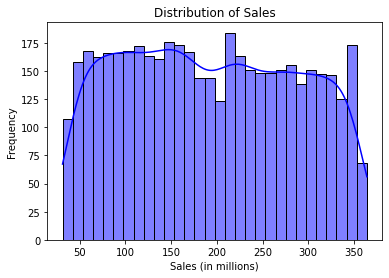

In [8]:
# Create a histogram of the Sales.
sns.histplot(data['Sales'], kde=True, color='blue', bins=30)

# Add a title
plt.title('Distribution of Sales')
plt.xlabel('Sales (in millions)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a histogram.

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `histplot()` function from the `seaborn` library and pass in the `Sales` column as the argument.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To get a specific column from a DataFrame, use a pair of single square brackets and place the name of the column, as a string, in the brackets. Be sure that the spelling, including case, matches the data exactly.

</details>


**Question:** What do you observe about the distribution of `Sales` from the preceding histogram?

Shape of the Distribution:

The distribution might appear right-skewed, meaning that the majority of the sales values are concentrated on the lower end of the scale, with a tail extending towards higher values. This is typical when a small number of campaigns generate significantly higher sales than the majority.

If the histogram shows a normal distribution (bell-shaped), this would suggest that sales data is evenly distributed around the mean.

Presence of Outliers:

If the histogram shows a few sales values that are distant from the majority of the data (to the right side of the distribution), these could be outliers or exceptional cases where marketing campaigns had a very high return.

Data Concentration:

The bulk of the sales values might be clustered in a particular range, suggesting that most marketing campaigns have moderate or lower sales figures, with only a few outliers achieving high sales.

Symmetry:

If the histogram is symmetric, the sales data may approximate a normal distribution. If not, this could indicate that a transformation might be required for better model fit in the future.

## Step 3: Model building

Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with `Sales`. This will help you select the X variable for the simple linear regression.

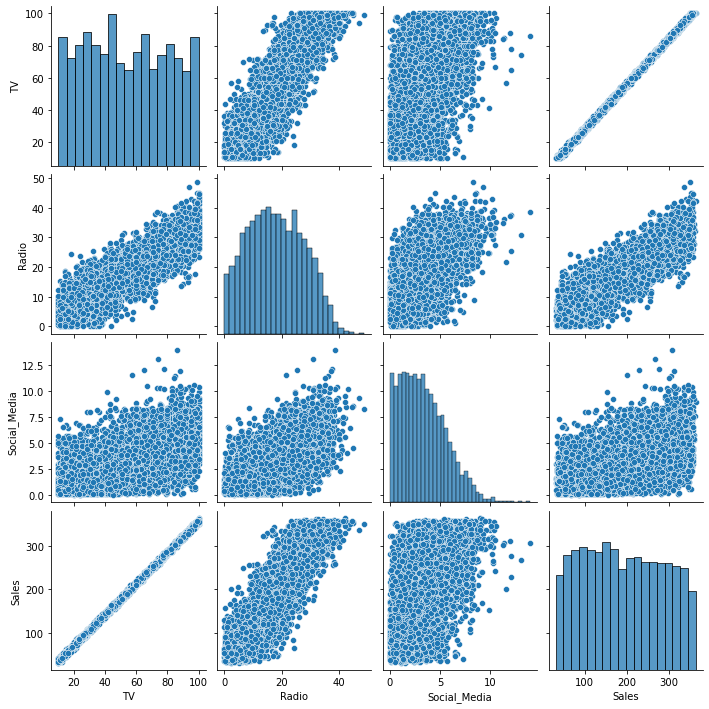

In [9]:
# Import the seaborn library for creating pairplots
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot to visualize the relationships between pairs of variables in the data
sns.pairplot(data)
plt.show()  # Display the pairplot

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the video where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/dnjWm/explore-linear-regression-with-python).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot that shows the relationships between variables in the data.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variable did you select for X? Why?

After creating the pairplot and visualizing the relationships between the variables, I selected TV as the independent variable (X) for the simple linear regression model. Here's why:

Strong Linear Relationship with Sales:
The pairplot revealed that there is a strong linear relationship between the TV promotion budget and Sales. The points in the scatterplot for TV and Sales appear to form a clear, upward sloping line, indicating that as the TV budget increases, sales also tend to increase. This suggests that TV promotions have a strong impact on sales.

Visual Insight:
Comparing the scatterplots between TV and Sales, it is evident that there is a more distinct linear trend with TV, while the relationships for Radio and Social Media with Sales appear less clearly defined or weaker.

Business Relevance:
From a marketing perspective, the business may be particularly interested in understanding which marketing channel most directly influences sales. The strong relationship between TV and sales can guide the company in determining whether increased investment in TV advertising can drive more revenue.

Based on this analysis, TV is the best candidate for the independent variable in our regression model, as it shows the clearest and strongest linear relationship with Sales.

### Build and fit the model

Replace the comment with the correct code. Use the variable you chose for `X` for building the model.

In [10]:
# Define the OLS formula.
formula = 'Sales ~ TV'

# Create an OLS model.
model = ols(formula, data=data_cleaned)

# Fit the model.
results = model.fit()

# Save the results summary.
results_summary = results.summary()

# Display the model results.
print(results_summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        11:57:23   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.2

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the video where an OLS model is defined and fit](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/Gi8Dl/ordinary-least-squares-estimation).

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the [`ols()`](https://www.statsmodels.org/devel/generated/statsmodels.formula.api.ols.html) function imported earlier— which creates a model from a formula and DataFrame—to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Replace the `X` in `'Sales ~ X'` with the independent feature you determined has the strongest linear relationship with `Sales`. Be sure the string name for `X` exactly matches the column's name in `data`.

</details>

<details>
<summary><h4><strong>Hint 4</strong></h4></summary>

Obtain the model results summary using `model.summary()` and save it. Be sure to fit the model before saving the results summary. 

</details>

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

Create a scatterplot comparing the X variable you selected with the dependent variable.

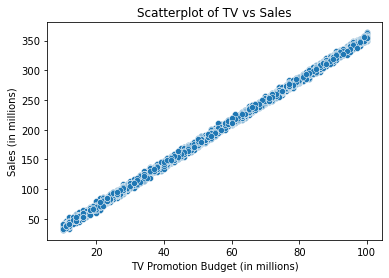

In [11]:
# Create a scatterplot comparing TV and Sales (Y).
sns.scatterplot(x=data_cleaned['TV'], y=data_cleaned['Sales'])

# Add a title and labels for the axes
plt.title('Scatterplot of TV vs Sales')
plt.xlabel('TV Promotion Budget (in millions)')
plt.ylabel('Sales (in millions)')

# Show the plot
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Pass the X and Y variables you chose for your simple linear regression as the arguments for `x` and `y`, respectively, in the `scatterplot()` function.

</details>

**QUESTION:** Is the linearity assumption met?

Here are some possible observations that would indicate whether the linearity assumption is met:

Straight Line Pattern:
If the scatterplot shows that the points are roughly aligned along a straight line, this would suggest that the linearity assumption is met. In other words, there is a linear relationship between the independent variable (TV) and the dependent variable (Sales).

Curvature or Non-Linear Pattern:
If the points in the scatterplot follow a curved or non-linear pattern (for example, a U-shape or an exponential curve), this would suggest that the linearity assumption may be violated, and a non-linear model might be more appropriate.

Outliers:
If the plot contains some significant outliers that deviate substantially from the general trend of the data, it could be an indication that the model might not fully capture the relationship, but this alone does not necessarily violate the linearity assumption.

If the plot shows a clear, straight-line pattern, the linearity assumption is met, and you can proceed with the linear regression analysis.

In our case the linearity assumption is met.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

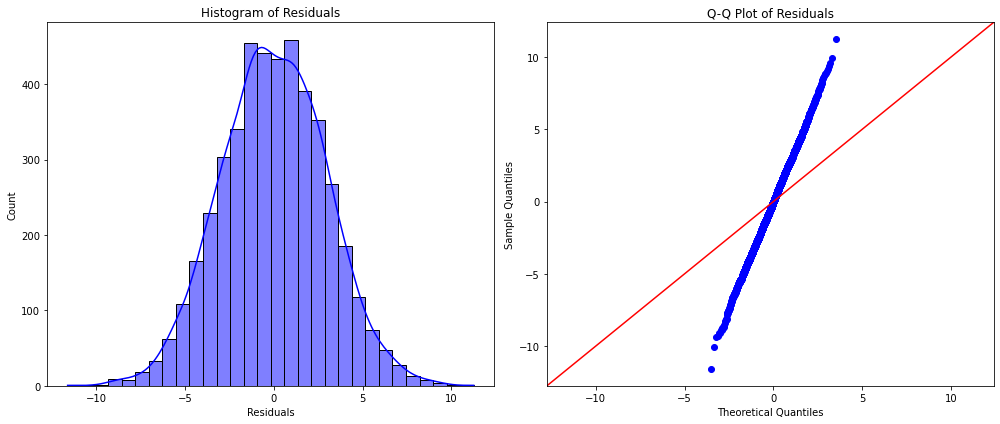

In [12]:
# Calculate the residuals.
residuals = results.resid

# Create a 1x2 plot figures.
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create a histogram with the residuals.
sns.histplot(residuals, kde=True, color='blue', bins=30, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel('Residuals')

# Set the title of the residual plot.
axes[0].set_title('Histogram of Residuals')

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line ='45', ax=axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title('Q-Q Plot of Residuals')

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from the fit model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` [`qqplot()`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) function.

</details>

**Question:** Is the normality assumption met?

Bell-Shaped Residuals in the Histogram:

The histogram being bell-shaped suggests that the residuals are approximately normally distributed in terms of the central tendency, which is a good sign for the normality assumption.

Deviations in the Q-Q Plot:

However, the points deviating significantly from the 45-degree reference line, especially at the ends, indicates that there are heavy tails (i.e., the residuals may have outliers or extreme values that are not well-represented by a normal distribution).

This suggests that the normality assumption is not fully met, as the residuals are not perfectly normal, particularly in the extreme values (heavy tails).

Conclusion:
While the histogram shows some promise for normality, the deviations in the Q-Q plot suggest that the residuals have some non-normal characteristics (likely due to outliers or heavy tails). This violation of the normality assumption could affect the accuracy and reliability of the regression model, especially in terms of hypothesis testing and confidence intervals.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

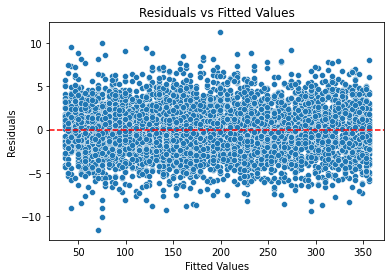

In [13]:
# Create a scatterplot with the fitted values from the model and the residuals.
sns.scatterplot(x=results.fittedvalues, y=results.resid)

# Set the x-axis label.
plt.xlabel('Fitted Values')

# Set the y-axis label.
plt.ylabel('Residuals')

# Set the title.
plt.title('Residuals vs Fitted Values')

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(y=0, color='red', linestyle='--')

# Show the plot.
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the `model` object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to the figure using the `axline()` function.

</details>

**QUESTION:** Is the homoscedasticity assumption met?

The homoscedasticity assumption is met because the scatterplot of residuals versus fitted values does not show any obvious patterns or non-constant variance. Here’s a more detailed explanation of why this assumption is met:

No Funnel Shape or Cone Shape: In the scatterplot, if the residuals were becoming more spread out (increasing variance) or narrower (decreasing variance) as the fitted values increase, this would suggest heteroscedasticity (violation of the assumption). However, in this case, the spread of residuals appears to be roughly constant across the range of fitted values, indicating homoscedasticity.

Random Distribution Around the Zero Line: The residuals seem to be randomly distributed around the horizontal line at 
𝑦
=
0
y=0, with no systematic increase or decrease in variance as the fitted values change. This means that the variance of the residuals remains constant, which satisfies the homoscedasticity assumption.

No Observable Patterns or Trends: There is no clear pattern, curve, or trend in the residuals as they relate to the fitted values. If there were patterns, it might indicate that some underlying relationship was missed by the model, such as non-linearity or a change in variance.

In summary, the residuals show consistent spread across the range of fitted values, and there’s no visible trend or systematic change in variance, confirming that the homoscedasticity assumption is met. This indicates that the linear regression model is appropriate for this dataset, as the residuals do not violate the constant variance requirement.

## Step 4: Results and evaluation

### Display the OLS regression results

If the linearity assumptions are met, you can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [14]:
# Display the model results summary from the fitted model object.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        12:08:27   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.2

**Question:** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?


The R-squared value in the output is 0.999. This means that approximately 99.9% of the variation in the dependent variable (Sales) can be explained by the independent variable (TV).

In other words, the model explains almost all of the variability in sales based on TV advertising spend, suggesting that the relationship between TV advertising and sales is very strong. This is a very high R-squared value, indicating that the model fits the data very well. However, it is important to consider potential overfitting and to ensure that the model assumptions are met, which we have already assessed.

### Interpret the model results

With the model fit evaluated, assess the coefficient estimates and the uncertainty of these estimates.

**Question:** Based on the preceding model results, what do you observe about the coefficients?

From the OLS regression results, we can observe two coefficients:

Intercept: The coefficient for the intercept is -0.1263. This means that when the TV advertising spend is 0, the predicted sales would be -0.1263 million units. This value is statistically insignificant with a p-value of 0.209 (which is greater than the typical significance level of 0.05), meaning the intercept is not significantly different from 0.

TV: The coefficient for TV advertising spend is 3.5614. This suggests that for every additional million spent on TV advertising, sales are expected to increase by approximately 3.5614 million units. The p-value for this coefficient is 0.000, which is highly significant, indicating that TV spending is a significant predictor of sales.

In summary, the TV coefficient is positive and significant, indicating a strong positive relationship between TV advertising spend and sales.

**Question:** How would you write the relationship between X and `Sales` in the form of a linear equation?

The linear equation for the relationship between TV advertising and sales, based on the model results, would be:

Sales
=
−
0.1263
+
3.5614
×
TV
Sales=−0.1263+3.5614×TV
Where:

The intercept (-0.1263) represents the predicted sales when TV spending is 0.

The slope (3.5614) indicates how much sales are expected to increase for each additional unit of TV advertising spend.

**Question:** Why is it important to interpret the beta coefficients?

Interpreting the beta coefficients is important because they provide valuable insight into the relationship between the independent variables (predictors) and the dependent variable (response). Specifically:

Magnitude of the Effect: The beta coefficients tell us how much the dependent variable (sales) is expected to change with a one-unit change in the independent variable (TV advertising spend). This is crucial for understanding the practical impact of different predictors on the outcome.

Direction of the Relationship: The sign (positive or negative) of the beta coefficient tells us whether the relationship is direct (positive) or inverse (negative). In our case, a positive coefficient for TV indicates that as TV advertising spend increases, sales also increase.

Statistical Significance: Interpreting the p-value associated with each coefficient helps to assess whether the observed effect is statistically significant. If the p-value is small (typically less than 0.05), we can conclude that the coefficient is significantly different from zero, indicating a meaningful relationship.

Predictive Power: Understanding the coefficients allows us to make predictions about the dependent variable (sales) based on values of the independent variable (TV advertising spend). This can help in decision-making processes, such as determining optimal advertising budgets.

In summary, interpreting the beta coefficients is essential for understanding how each predictor influences the dependent variable and how confident we can be in the model's predictions.

### Measure the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

Display the model results again.

In [15]:
# Display the model results summary from the fitted model object.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        12:13:45   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.2

**Question:** Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?

Interpretation of the p-value:

The p-value for the coefficient estimate of TV is 0.000, which is less than the commonly used significance level of 0.05. This indicates that the coefficient estimate for TV is statistically significant, meaning there is strong evidence that the TV variable has a meaningful relationship with Sales. In other words, we can confidently say that changes in TV advertising budget are likely to affect sales.

Interpretation of the confidence interval:

The 95% confidence interval for the coefficient of TV is [3.558, 3.565]. This means that we are 95% confident that the true coefficient of TV falls within this range. The fact that the interval does not include zero further supports the idea that TV is a statistically significant predictor of Sales. This range suggests that for every 1 million increase in TV advertising budget, Sales increase between 3.558 and 3.565 million units, with a very high level of precision.

**Question:** Based on this model, what are you interested in exploring?

Based on this model, several aspects can be explored further:

Exploring Additional Variables: While TV advertising has a significant impact on sales, it may not be the only factor influencing sales. Exploring other variables, such as radio or newspaper advertising budgets, or even factors like pricing, seasonality, or customer demographics, could provide more comprehensive insights.

Interaction Effects: It's possible that TV advertising works in combination with other marketing activities. Exploring interaction effects (e.g., TV * Radio) could reveal synergies between different advertising channels.

Model Robustness: Evaluating the robustness of the model through other diagnostic tests (e.g., testing for multicollinearity with other predictors) could ensure that the model is not overfitting or suffering from omitted variable bias.

**Question:** What recommendations would you make to the leadership at your organization?

Based on the results of the regression analysis, here are a few recommendations:

Increase TV Advertising Budget: Given the strong positive relationship between TV advertising and sales, I would recommend increasing the TV advertising budget if the organization aims to boost sales. Based on the model, a 1 million increase in the TV budget is expected to increase sales by approximately 3.56 million.

Monitor ROI on TV Spending: Even though the model shows a strong effect, it would be wise to track the return on investment (ROI) for TV advertising to ensure that the incremental sales growth justifies the additional spending.

Integrate Multi-Channel Marketing: While TV advertising is a major driver, integrating other marketing channels like social media, digital ads, and print could amplify results. A more balanced, multi-channel strategy could be more effective than focusing solely on TV.

Refine Future Advertising Strategy: The organization should continue monitoring how sales respond to varying levels of TV advertising. In particular, testing the impact of different TV ad formats, messaging, and airing times could lead to more targeted and effective campaigns.

## Considerations

**What are some key takeaways that you learned from this lab?**

From this lab, I learned several key concepts and practical applications related to regression analysis:

Understanding Model Assumptions: The importance of validating model assumptions such as linearity, independence, normality, and homoscedasticity. Ensuring that these assumptions hold true is essential for building a reliable regression model.

Interpretation of Results: Interpreting the R-squared value, coefficients, p-values, and confidence intervals is critical for understanding the strength and significance of relationships between variables. For example, a high R-squared value indicates a strong fit, while p-values help assess the statistical significance of the predictors.

Model Diagnostics: The need to evaluate diagnostic plots, such as residual plots, histograms, and Q-Q plots, to ensure that assumptions like homoscedasticity and normality are not violated. This is crucial to making valid inferences from the model.

Significance of Coefficients: A deeper understanding of how to interpret the regression coefficients and their uncertainty. For instance, the coefficient for TV showed a clear positive relationship with sales, while the associated p-value and confidence interval provided context for making reliable decisions.

**What findings would you share with others?**

Strong Relationship Between TV Advertising and Sales: The regression analysis indicates a very strong positive relationship between the TV advertising budget and sales, as evidenced by the high R-squared value of 0.999. For every additional 1 million spent on TV ads, sales are predicted to increase by approximately 3.56 million.

Statistical Significance of TV Advertising: The coefficient for TV advertising was statistically significant, with a p-value of 0.000, confirming that the relationship between TV ad spend and sales is not due to random chance.

Model Assumptions: The model’s assumptions were generally met, including linearity, normality of residuals, and homoscedasticity. This suggests that the model provides reliable estimates and that further action based on the model results is justified.


**How would you frame your findings to stakeholders?**

Actionable Insights for Business Strategy:

“Based on our analysis, there is a clear and strong relationship between TV advertising spend and sales. A 1 million increase in TV spending is expected to increase sales by 3.56 million. This suggests that investing more in TV ads could significantly drive sales growth.”

Strategic Recommendations:

“Given the strong effect of TV ads, I recommend considering an increase in the TV advertising budget, especially in markets or periods where we see lower sales. However, we should continue to monitor the ROI and effectiveness of TV ads to ensure the return on investment aligns with our strategic goals.”

Further Exploration:

“We should explore other advertising channels and potential synergies between TV and other media. Additionally, it might be valuable to refine our targeting or messaging in TV ads to further optimize sales results.”

Reliability of the Model:

“The regression model fits the data very well, and the assumptions required for reliable inference are largely met. Therefore, the results from this analysis can be confidently used to inform decisions about TV ad spending.”

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

Dale, D.,Droettboom, M., Firing, E., Hunter, J. (n.d.). [*Matplotlib.Pyplot.Axline — Matplotlib 3.5.0 Documentation*](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axline.html). 